# **PREDICTING THE SKY: A RANDOM FOREST APPROACH TO WEATHER ANALYSIS**

##  IMPORT  LIBRARIES

In [1]:
! pip install imblearn

In [2]:
# for data importing
import pandas as pd
import numpy as np

# for viz
import matplotlib.pyplot as plt
import seaborn as sns

# for spliting
from sklearn.model_selection import train_test_split
# encoding
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,StandardScaler
import time

#evalution methods
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,f1_score,precision_score

#evalution methods
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix

# ML models:
from sklearn.linear_model import LogisticRegression

# BALANCING
from imblearn.over_sampling import SMOTE


## 1.IMPORT DATASET

https://www.kaggle.com/datasets/muthuj7/weather-dataset

In [3]:
df=pd.read_csv("WEATHER.csv")
df.head(3)

,Formatted Date,Date,Month,Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,01-04-2006,4,00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,01-04-2006,4,01:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,01-04-2006,4,02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.


## 2.DATA INFORMATION

- **Precipitation** is any product of atmospheric water vapor that falls from clouds to the Earth's surface due to gravity.
- **Temperature** is a measure of the actual heat in the air, while  
- **Apparent temperature** (or *"feels like"* temperature) is how hot or cold it feels to the human body.

In [4]:
df.columns

Index(['Formatted Date', 'Date', 'Month', 'Time', 'Summary', 'Precip Type',
       'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Date                      96453 non-null  object 
 2   Month                     96453 non-null  int64  
 3   Time                      96453 non-null  object 
 4   Summary                   96453 non-null  object 
 5   Precip Type               95936 non-null  object 
 6   Temperature (C)           96453 non-null  float64
 7   Apparent Temperature (C)  96453 non-null  float64
 8   Humidity                  96453 non-null  float64
 9   Wind Speed (km/h)         96453 non-null  float64
 10  Wind Bearing (degrees)    96453 non-null  int64  
 11  Visibility (km)           96453 non-null  float64
 12  Loud Cover                96453 non-null  int64  
 13  Pressure (millibars)      96453 non-null  float64
 14  Daily 

In [6]:
df.shape

(96453, 15)

## 3.DATA CLEANING & PRE-PROCCESING

In [7]:
# DROPING "FORMATTED DATE" COLUMN [we have date & time]:
df.drop(columns=["Formatted Date"],axis=1,inplace=True)
df.tail(5)

,Date,Month,Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,09-09-2016,9,19:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,09-09-2016,9,20:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,09-09-2016,9,21:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,09-09-2016,9,22:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.
96452,09-09-2016,9,23:00,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39,15.5204,0,1016.16,Partly cloudy starting in the morning.


In [8]:
# DROPING DAILY SUMMARY BY KEEPING SUMMARY

# print(df["Summary"].value_counts())
# print(df["Daily Summary"].value_counts())
df.drop(columns=["Daily Summary"],axis=1,inplace=True)

In [9]:
#DROPING "LOUD COVER" (ALL VALUES ARE EQUAL)
df.drop(columns=["Loud Cover"],axis=1,inplace=True)

In [10]:
#DROPING DATE (WE HAVE MONTH & TIME) NO MORE IMPORTANCE IN WEATHER PREDICTION
df.drop(columns=["Date"],axis=1,inplace=True)

In [11]:
#DROPING DUPLICATED VALUES
df.duplicated().sum()
df=df.drop_duplicates()
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96429 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     96429 non-null  int64  
 1   Time                      96429 non-null  object 
 2   Summary                   96429 non-null  object 
 3   Precip Type               95912 non-null  object 
 4   Temperature (C)           96429 non-null  float64
 5   Apparent Temperature (C)  96429 non-null  float64
 6   Humidity                  96429 non-null  float64
 7   Wind Speed (km/h)         96429 non-null  float64
 8   Wind Bearing (degrees)    96429 non-null  int64  
 9   Visibility (km)           96429 non-null  float64
 10  Pressure (millibars)      96429 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 8.8+ MB


## 4.TRANSFORMING

 ### 4.1 BALANCING DATA

In [13]:
df['Summary'].value_counts()

Summary
Partly Cloudy                          31726
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10873
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [14]:

df_copy=df.copy()

In [15]:
# DRY CONDITION
df.loc[
    df["Summary"].isin([
        "Clear",
        "Dry",
        "Breezy and Dry",
        "Windy and Dry",
        "Dangerously Windy and Partly Cloudy"
    ]),
    "Summary"
] = "Dry Condition"


In [16]:
# CLOUDY CONDITIONS
df.loc[
    df["Summary"].isin([
        "Dry and Mostly Cloudy",
        "Humid and Partly Cloudy",
        "Humid and Mostly Cloudy",
        "Windy and Dry",
        "Dry and Partly Cloudy",
        "Windy and Mostly Cloudy",
        "Windy and Overcast",
        "Breezy and Partly Cloudy",
        "Breezy and Mostly Cloudy",
        "Breezy and Overcast",
        "Overcast",
        "Mostly Cloudy",
        "Partly Cloudy",
        "Humid and Overcast"
    ]),
    "Summary"  
] = "Cloudy Conditions"


In [17]:
# FOGGY CONDITION
df.loc[
    df["Summary"].isin([
        "Foggy",
        "Breezy and Foggy",
        "Windy and Foggy"
        
    ]),
    "Summary"  
] = "Foggy Conditions"


In [18]:
#WINDY CONDITION
df.loc[
    df["Summary"].isin([
        "Breezy",
        "Windy",
        "Windy and Partly Cloudy"  
    ]),
    "Summary"  
] = "Windy Conditions"

In [19]:
# RAINY CONDITION
df.loc[
    df["Summary"].isin([
        "Light Rain",
        "Drizzle",
        "Rain"
        
    ]),
    "Summary"  
] = "Rainy Conditions"


In [20]:
df["Summary"].value_counts()

Summary
Cloudy Conditions    78091
Dry Condition        10910
Foggy Conditions      7187
Windy Conditions       129
Rainy Conditions       112
Name: count, dtype: int64

### 4.2 FEATURE ENGINEERING

In [21]:
# TIME :  CHANGING TO "DAY" AND "NIGHT".
def FormatTime(t):
    t=t[:2]
    return int(t)
def DayNight(t):
    if t>=6 and t<=18:
        return"day"
    else:
        return"night"

In [22]:
df["Time"]=df["Time"].apply(lambda x :FormatTime(x))
df["Time"]=df["Time"].apply(lambda x :DayNight(x))

In [23]:
df["Time"].value_counts()

Time
day      52234
night    44195
Name: count, dtype: int64

### 4.3 ENCODING

In [24]:
df.describe(include="O").T

,count,unique,top,freq
Time,96429,2,day,52234
Summary,96429,5,Cloudy Conditions,78091
Precip Type,95912,2,rain,85200


In [25]:
# TIME :LABEL ENCODING 
label_encoder=LabelEncoder()
df["Time"]=label_encoder.fit_transform(df["Time"])

In [26]:
df["Time"].value_counts()

Time
0    52234
1    44195
Name: count, dtype: int64

In [27]:
# PRECIP TYPE: LABEL ENCODER
df["Precip Type"]=label_encoder.fit_transform(df["Precip Type"])


In [28]:
df["Precip Type"].value_counts()

Precip Type
0    85200
1    10712
2      517
Name: count, dtype: int64

In [29]:
# SUMMARY: LABEL ENCODER
df['Summary']=label_encoder.fit_transform(df["Summary"])

In [30]:
df['Summary'].value_counts()

Summary
0    78091
1    10910
2     7187
4      129
3      112
Name: count, dtype: int64

### 4.4 VISUALIZATION 

In [31]:
# sns.pairplot(df)

#### 4.4 CORRELATION & HEATMAP

<Axes: >

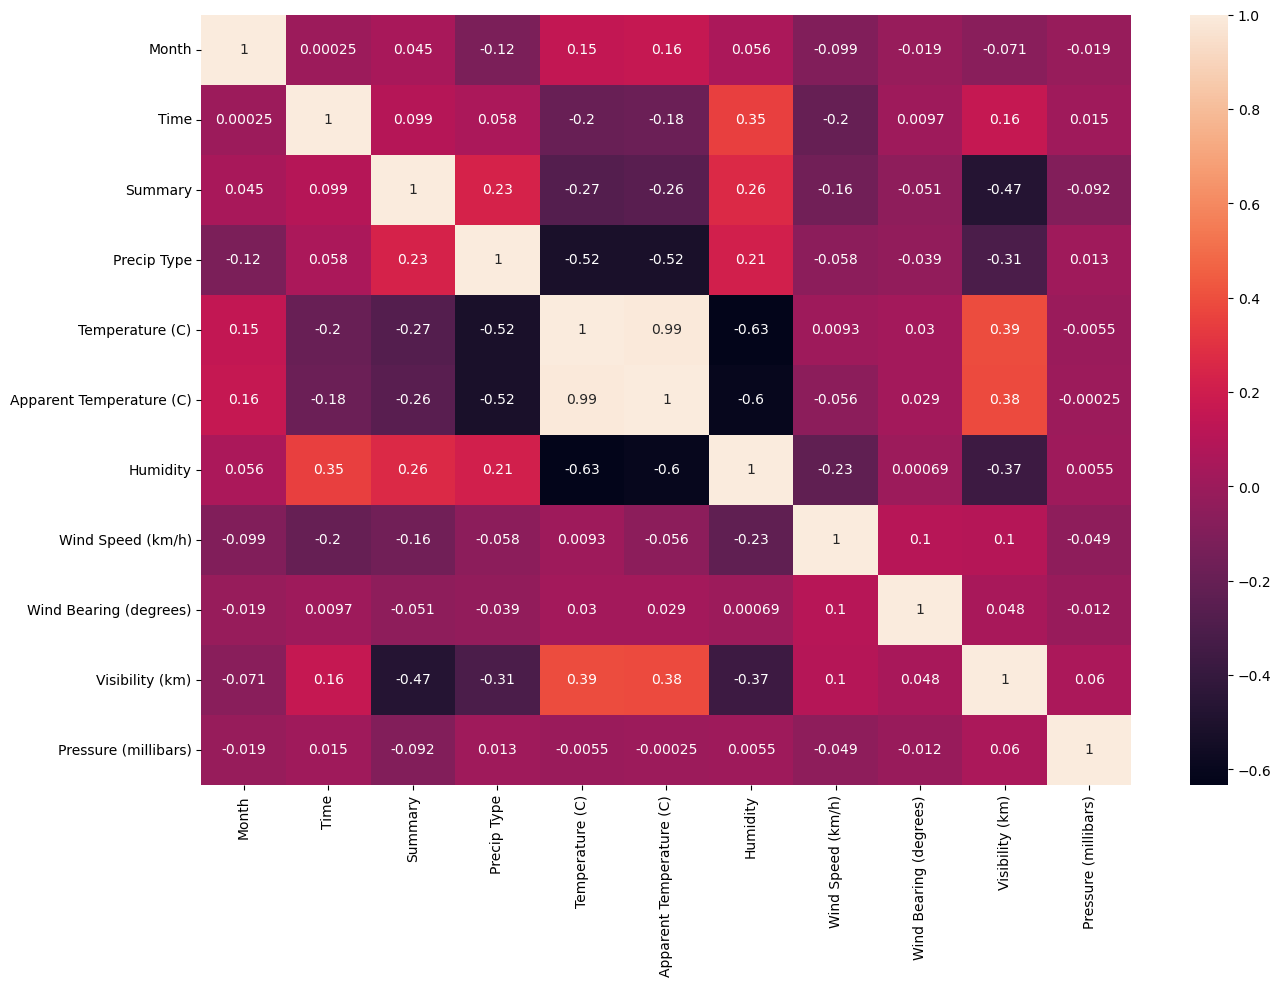

In [32]:
correlation_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cbar="coolwarm")

#### 4.4.1 COLLINEARITY FEATURE

In [33]:
# DROPING APARENT TEMPERATURE (NOT IMPORTANT FOR WEATHER PREDICTION),
# (ALSO HIGH CORRELATION WITH TEMPERATURE)

df.drop(columns=["Apparent Temperature (C)"],axis=1,inplace=True)

<Axes: >

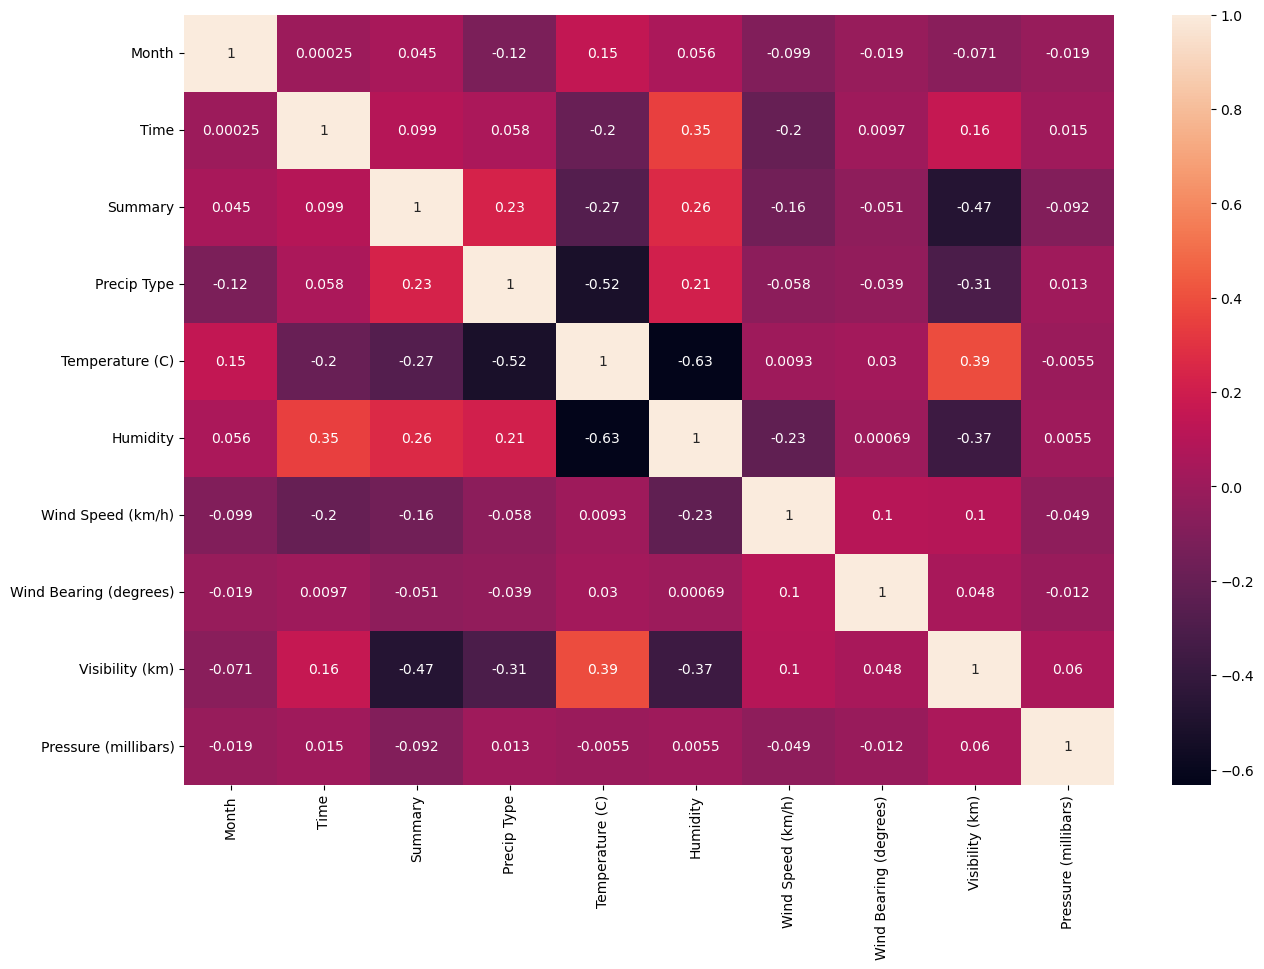

In [34]:
correlation_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cbar="coolwarm")

 **Group Name	Included Terms**
- Clear/Dry      :Clear, Dry, Breezy and Dry, Windy and Dry
- Cloudy	     :All “Cloudy” and “Overcast” variations
- Foggy	Foggy,   :Breezy and Foggy, Windy and Foggy
- Rainy	Drizzle, : Light Rain, Rain
- Windy	Breezy,  :Windy, Dangerously Windy

### 4.5 SKEWNESS HANDLING

In [35]:
# MAKING A COPY
df_copy_1=df.copy()


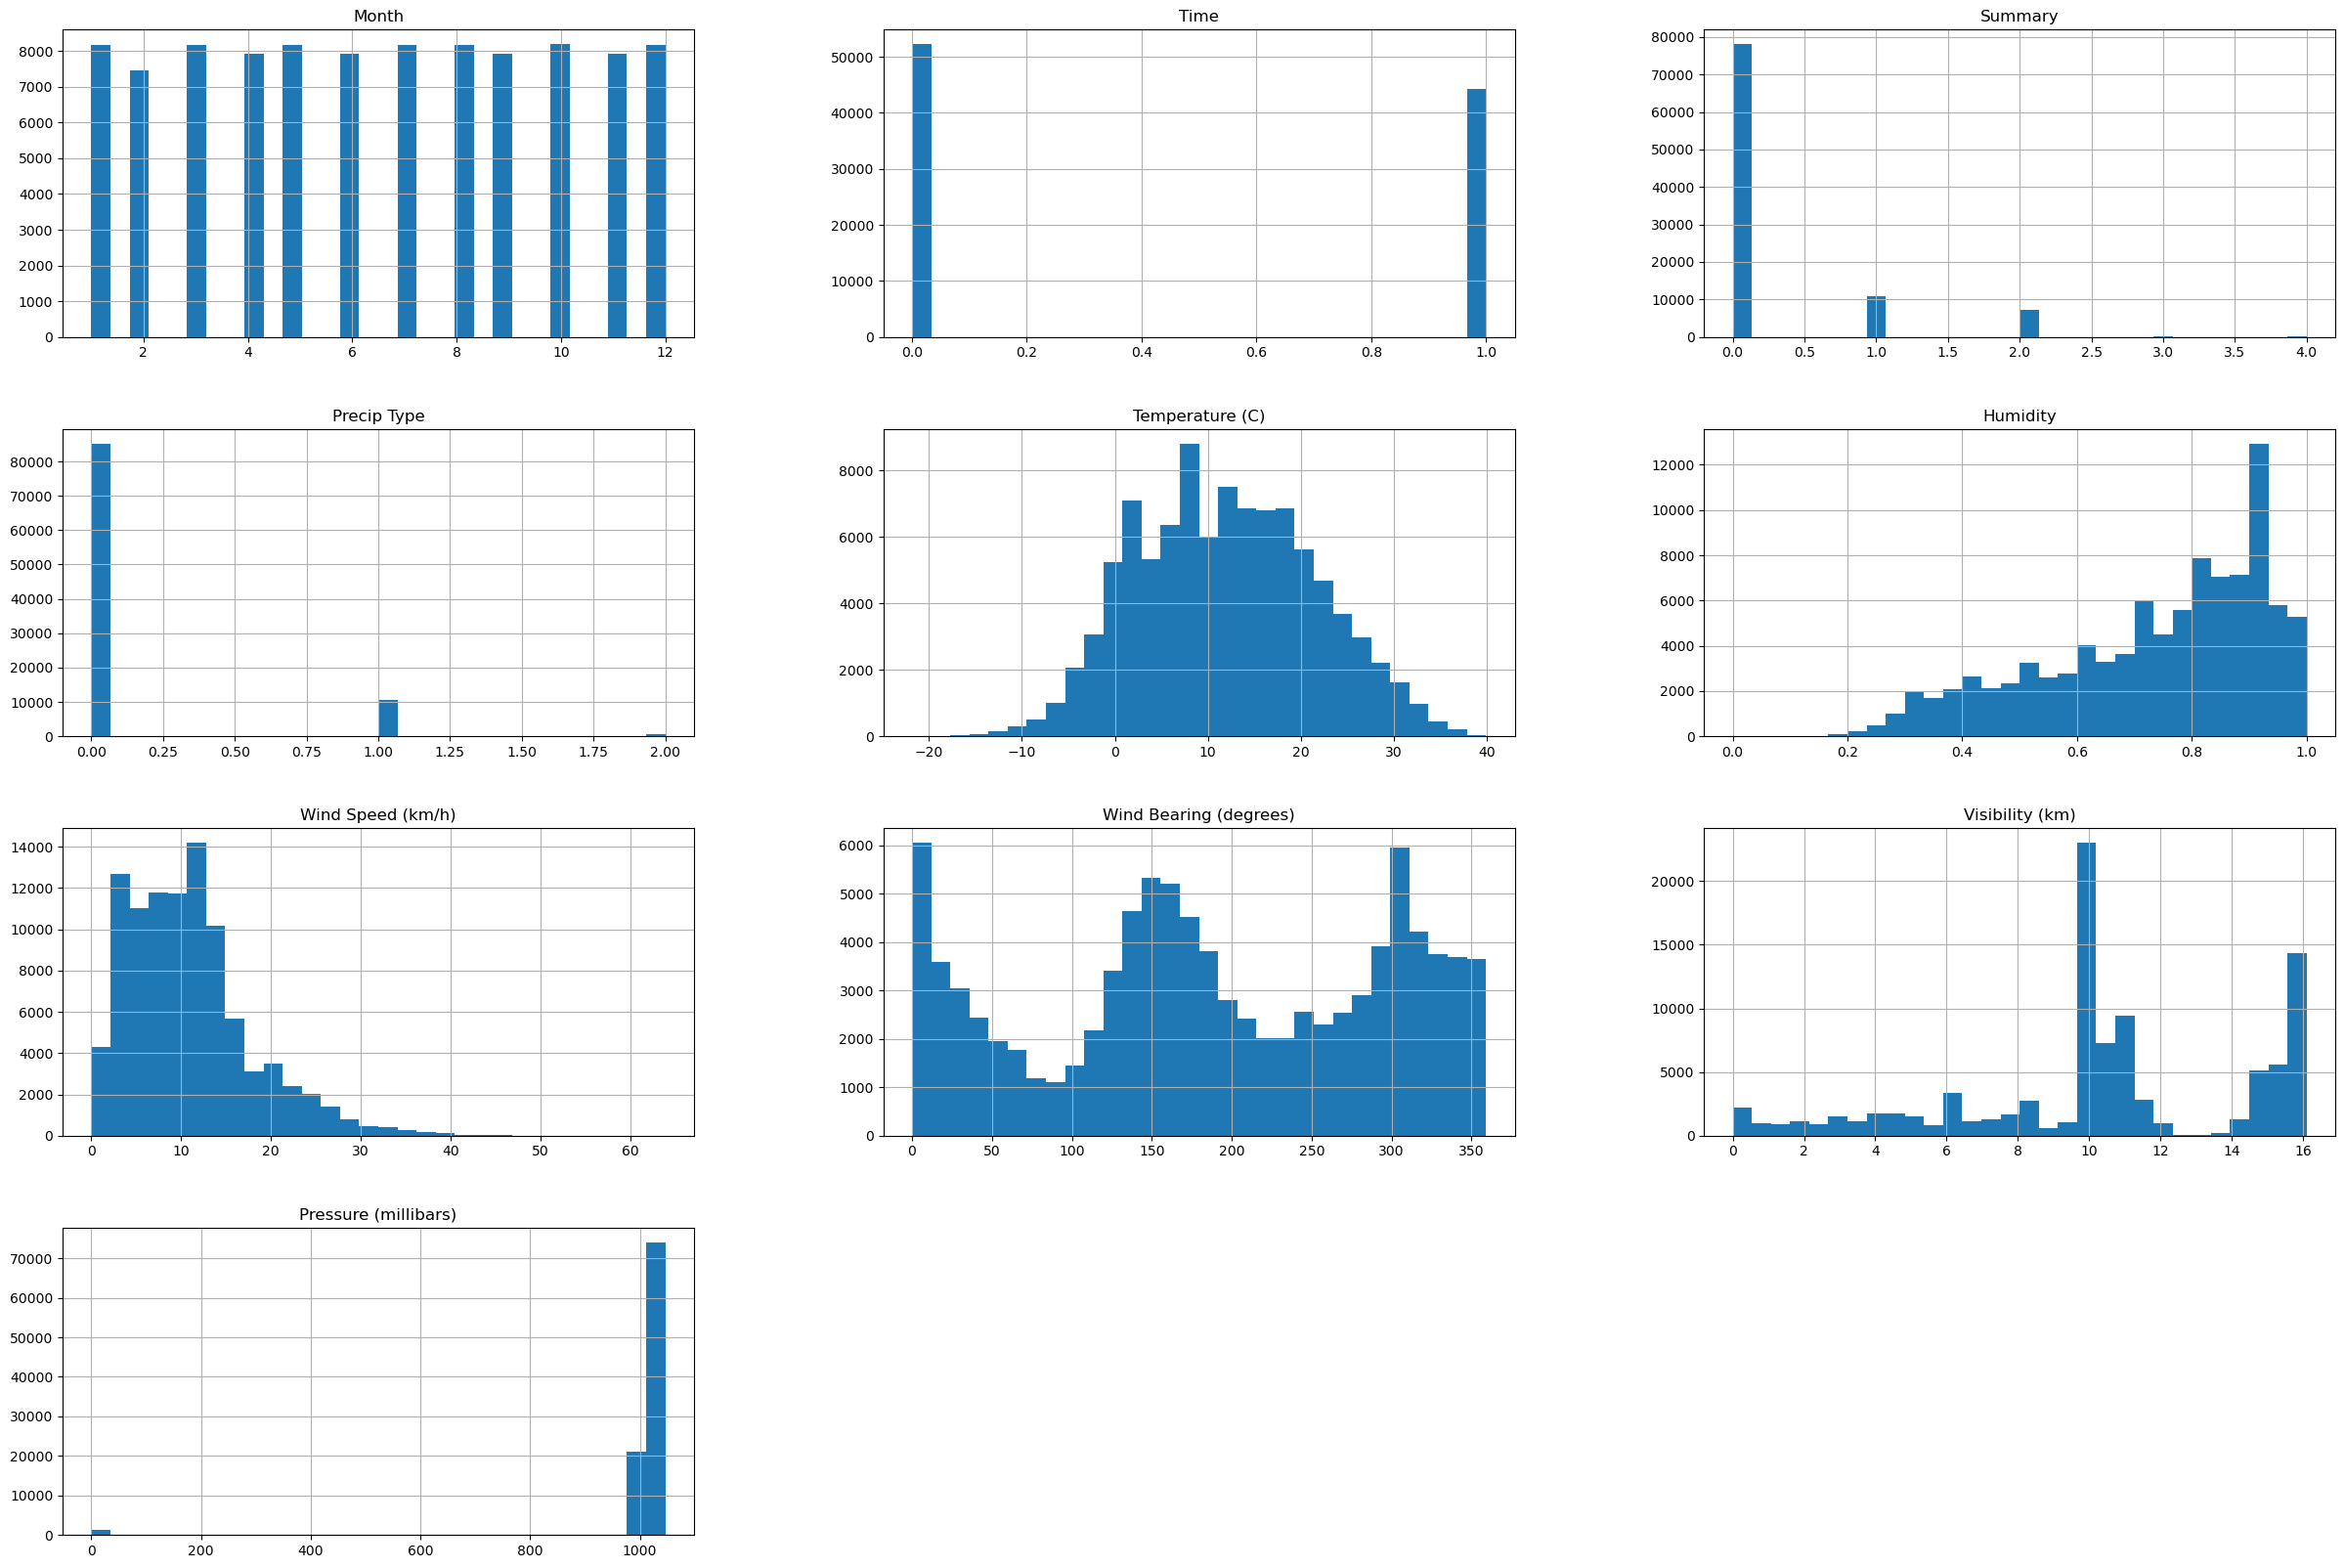

In [36]:

df_copy_1.hist(bins=30,figsize=(30,20))
plt.show()

In [37]:
#SELECTING SKEWED COLUMNS FROM NUMERIC COLUMNS
skewness=df.skew()
skewness.sort_values(ascending=True)


Pressure (millibars)     -8.421416
Humidity                 -0.716109
Visibility (km)          -0.498643
Wind Bearing (degrees)   -0.154419
Month                    -0.009632
Temperature (C)           0.094342
Time                      0.167319
Wind Speed (km/h)         1.113481
Summary                   2.250855
Precip Type               2.703587
dtype: float64

In [38]:
# FIXING WITH LOG1

# selecting numeric columns
columns=df.drop(columns=["Precip Type","Summary"]).select_dtypes(include=["number"])

# calculating skewness of numeric columns 
skewness=columns.skew()

# identify columns with high skewnwss (threshold(>1<-1))
highly_skew_cols=skewness[abs(skewness)>1].index

#  applying log1 transformaton for highly skewed columns
for col in highly_skew_cols:
    df[col]=np.log1p(df[col])  
#checking transformed columns
df.head()

,Month,Time,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,4,1,0,0,9.472222,0.89,2.715999,251,15.8263,6.923757
1,4,1,0,0,9.355556,0.86,2.725536,259,15.8263,6.924249
2,4,1,0,0,9.377778,0.89,1.595014,204,14.9569,6.924553
3,4,1,0,0,8.288889,0.83,2.714933,269,15.8263,6.925015
4,4,1,0,0,8.755556,0.83,2.488616,259,15.8263,6.925114


In [39]:
#SELECTING SKEWED COLUMNS FROM NUMERIC COLUMNS
skewness=df.skew()
skewness.sort_values(ascending=True)

Pressure (millibars)     -8.477194
Wind Speed (km/h)        -0.801660
Humidity                 -0.716109
Visibility (km)          -0.498643
Wind Bearing (degrees)   -0.154419
Month                    -0.009632
Temperature (C)           0.094342
Time                      0.167319
Summary                   2.250855
Precip Type               2.703587
dtype: float64

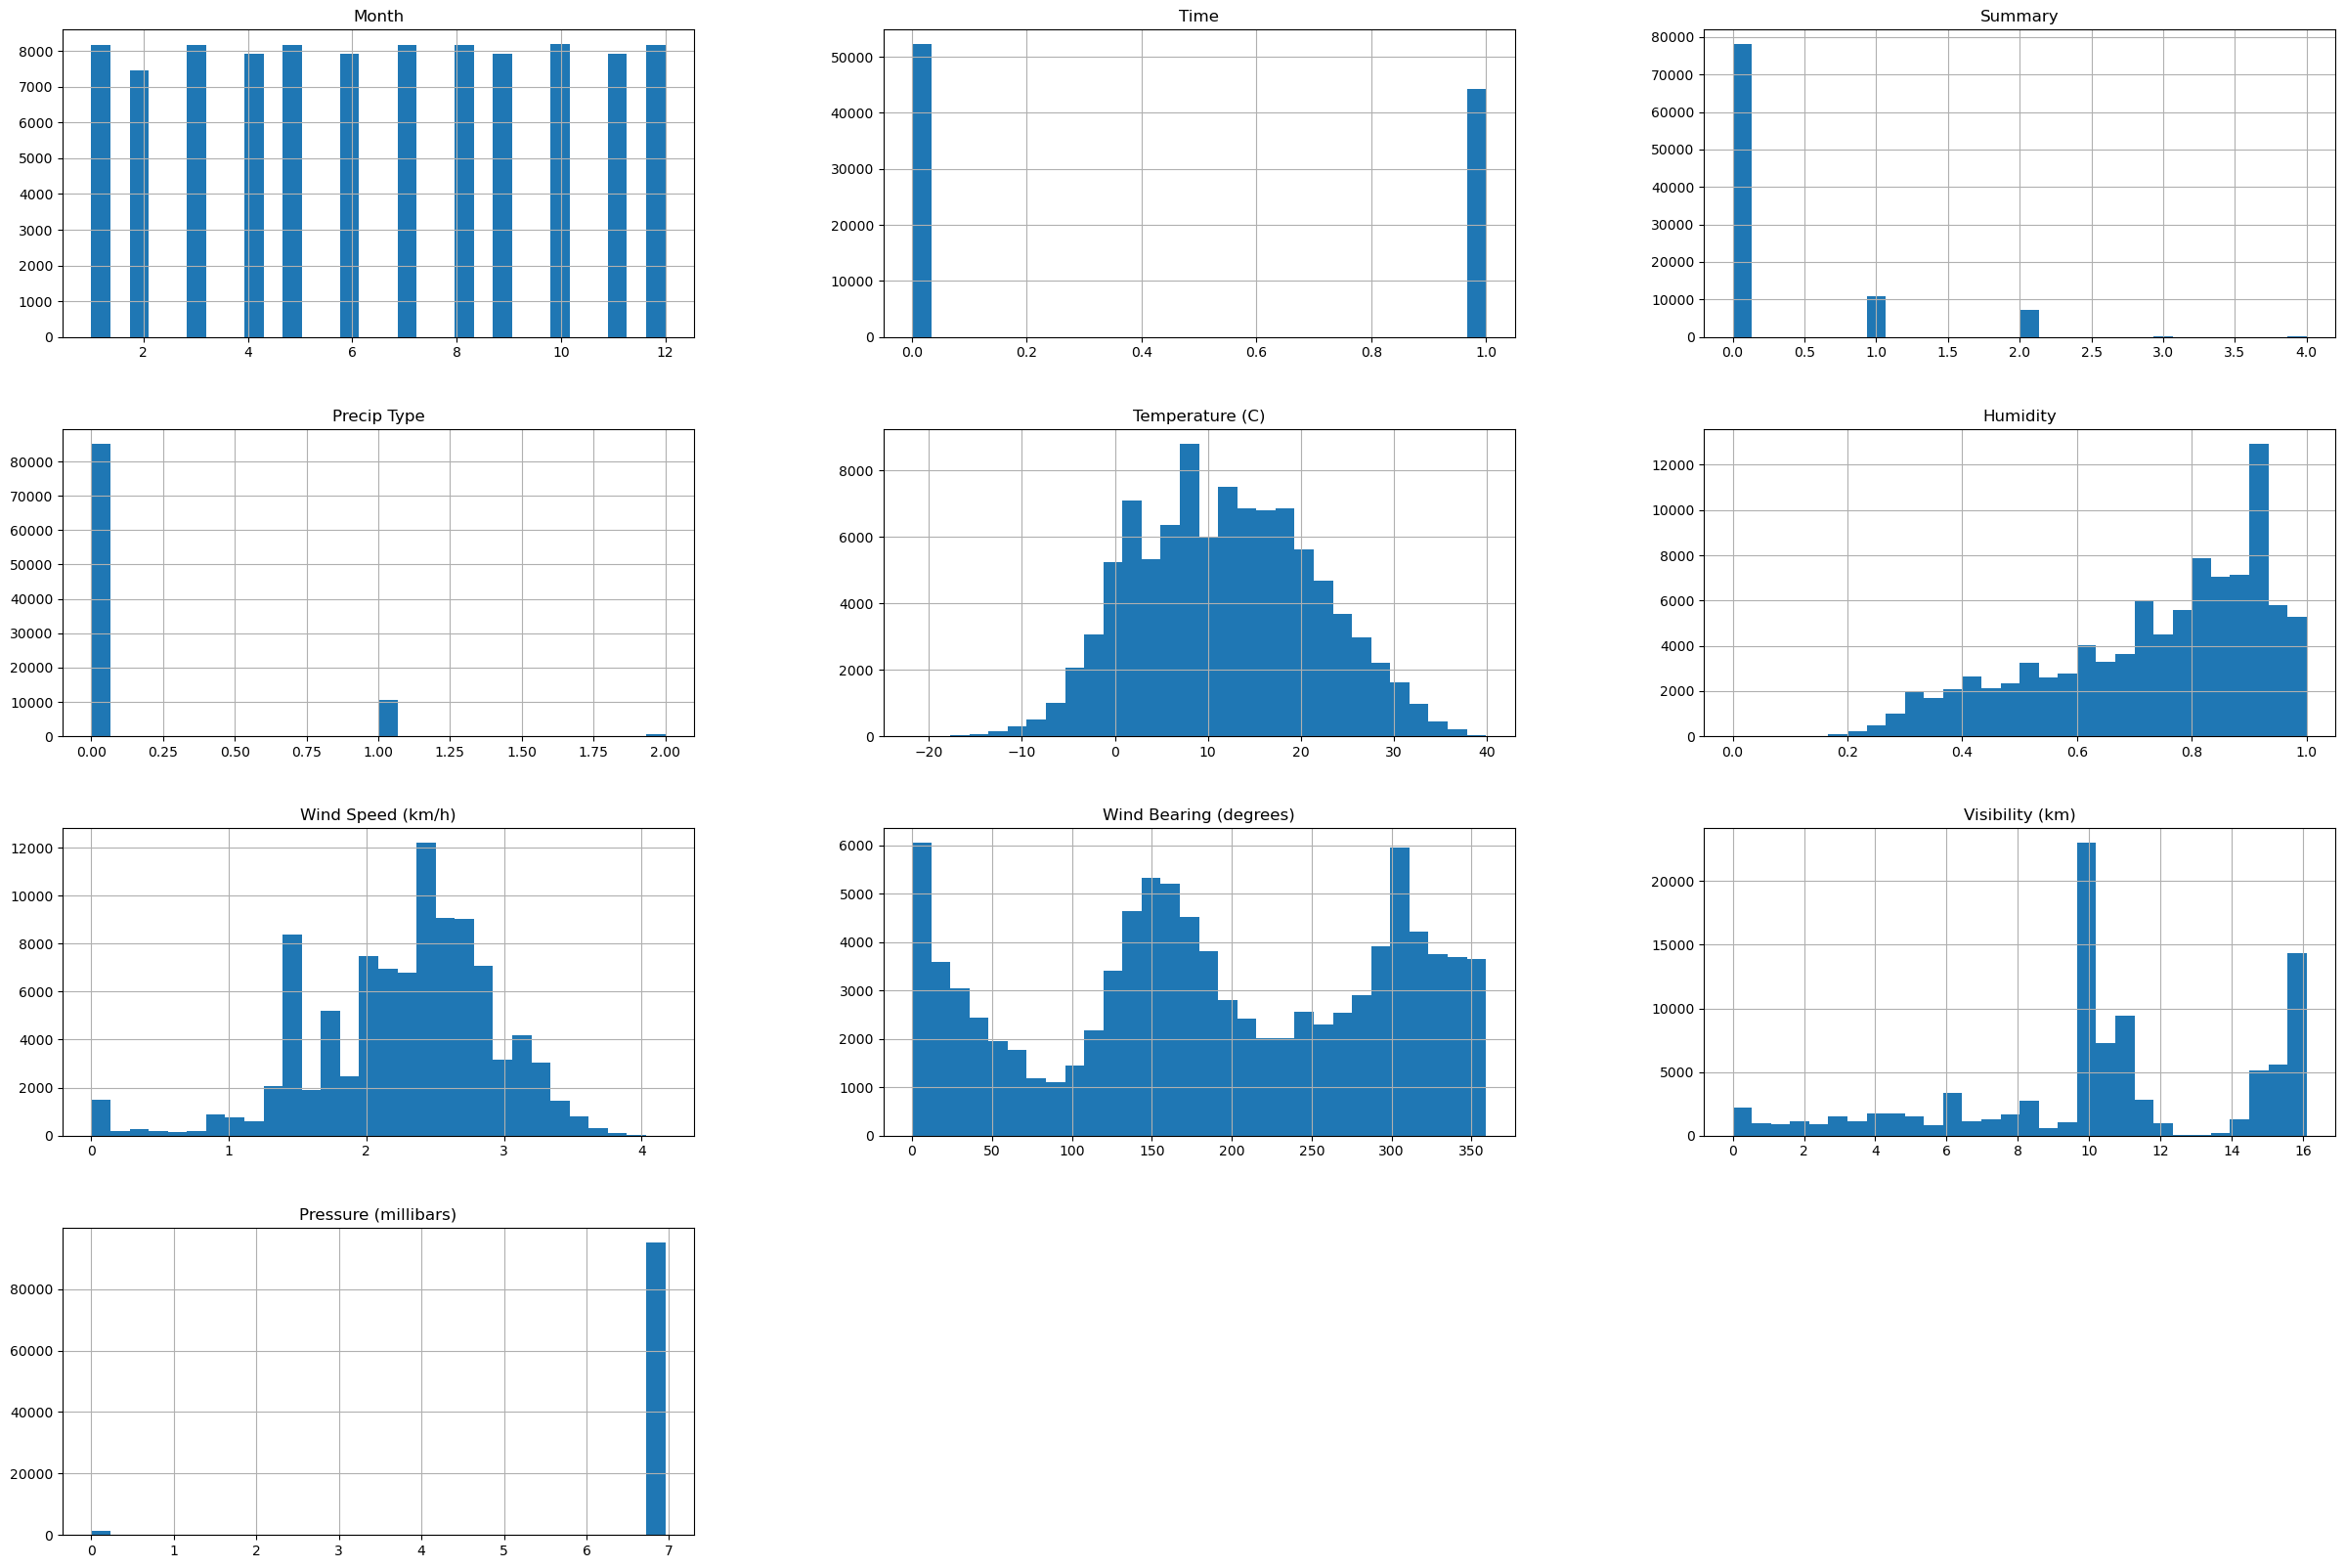

In [40]:
df.hist(bins=30,figsize=(30,20))
plt.show()

### 4.6 OUTLIER

In [41]:
df.shape

(96429, 10)

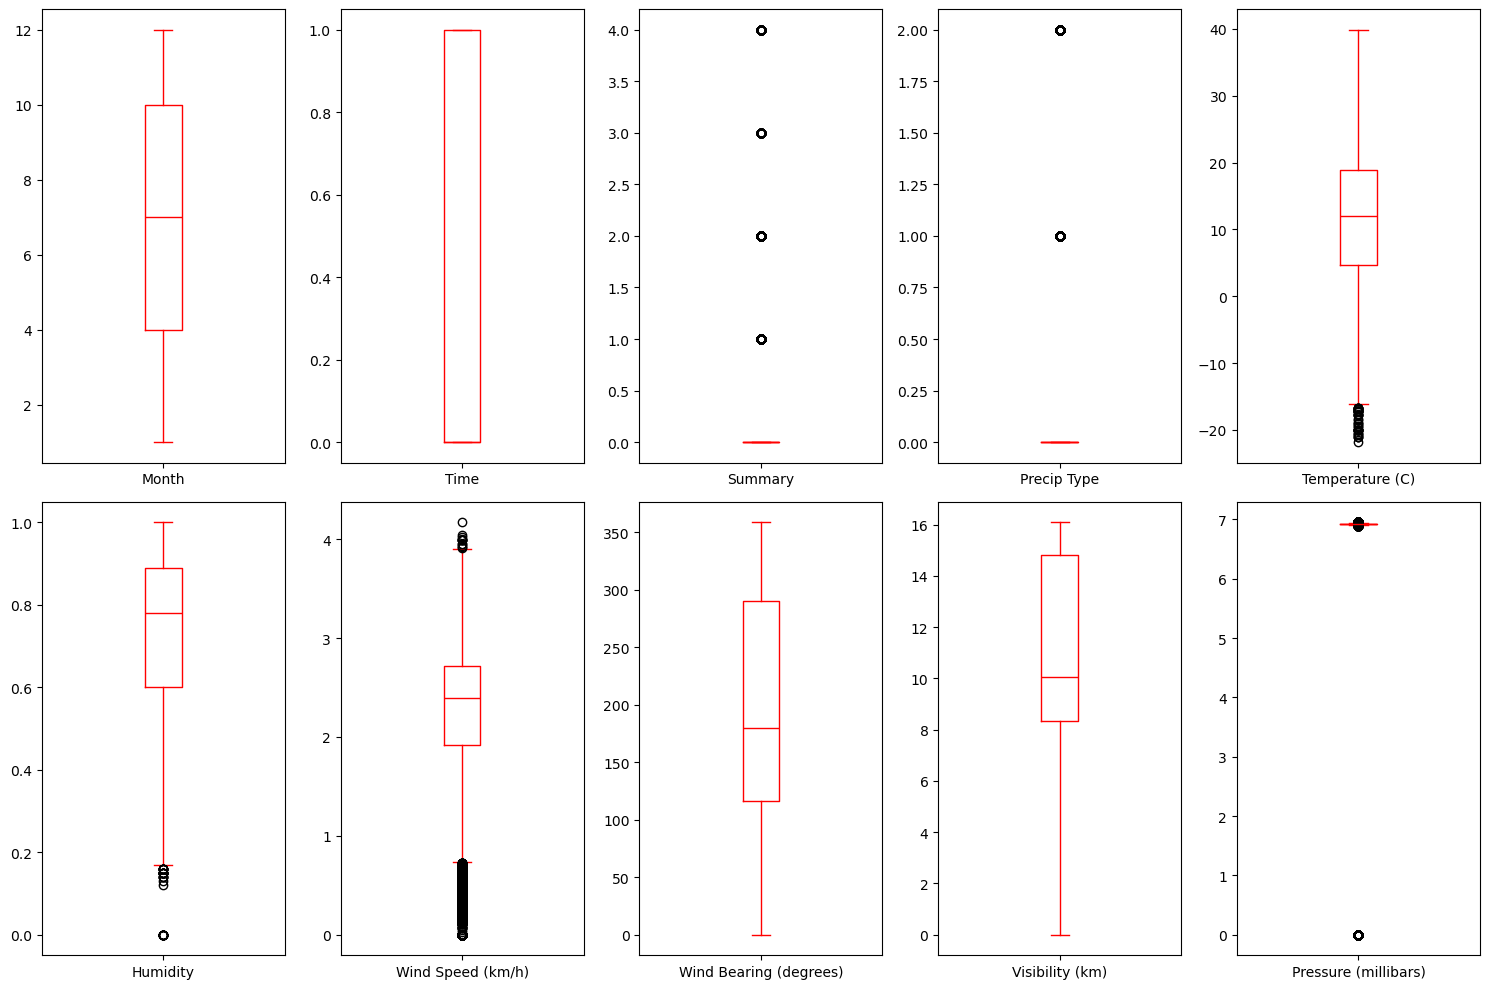

In [42]:
df.plot(kind="box",subplots=True,layout=(2,5),figsize=(15,10),color="r")
plt.tight_layout()
plt.show()

In [43]:
df.shape

(96429, 10)

In [44]:
# FINDIND AND REMOVING OUTLIER


for feature in df.drop(columns=["Precip Type","Summary"]).columns:
        Q1=df[feature].quantile(0.25)
        Q3=df[feature].quantile(0.75)
        IQR=Q3-Q1
        lower_bond=Q1-1.5*IQR
        upper_bond=Q3+1.5*IQR
        df=df[(df[feature] >= lower_bond)&(df[feature]<=upper_bond)]
df        


,Month,Time,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,4,1,0,0,9.472222,0.89,2.715999,251,15.8263,6.923757
1,4,1,0,0,9.355556,0.86,2.725536,259,15.8263,6.924249
2,4,1,0,0,9.377778,0.89,1.595014,204,14.9569,6.924553
3,4,1,0,0,8.288889,0.83,2.714933,269,15.8263,6.925015
4,4,1,0,0,8.755556,0.83,2.488616,259,15.8263,6.925114
...,...,...,...,...,...,...,...,...,...,...
96448,9,1,0,0,26.016667,0.43,2.484598,31,16.1000,6.922999
96449,9,1,0,0,24.583333,0.48,2.406468,20,15.5526,6.923786
96450,9,1,0,0,22.038889,0.56,2.300964,30,16.1000,6.924278
96451,9,1,0,0,21.522222,0.60,2.444900,20,16.1000,6.924563


In [45]:
# FINDIND AND REMOVING OUTLIER
'''
def remove_outliers_iqr(data):
    df_cleaned=data.copy()
    for feature in data.columns:
        Q1=data[feature].quantile(0.25)
        Q3=data[feature].quantile(0.75)
        IQR=Q3-Q1
        lower_bond=Q1-1.5*IQR
        upper_bond=Q3+1.5*IQR
        df_cleaned=df_cleaned[(df_cleaned[feature] >= lower_bond)&(df_cleaned[feature]<=upper_bond)]
    return df_cleaned
'''

    

'\ndef remove_outliers_iqr(data):\n    df_cleaned=data.copy()\n    for feature in data.columns:\n        Q1=data[feature].quantile(0.25)\n        Q3=data[feature].quantile(0.75)\n        IQR=Q3-Q1\n        lower_bond=Q1-1.5*IQR\n        upper_bond=Q3+1.5*IQR\n        df_cleaned=df_cleaned[(df_cleaned[feature] >= lower_bond)&(df_cleaned[feature]<=upper_bond)]\n    return df_cleaned\n'

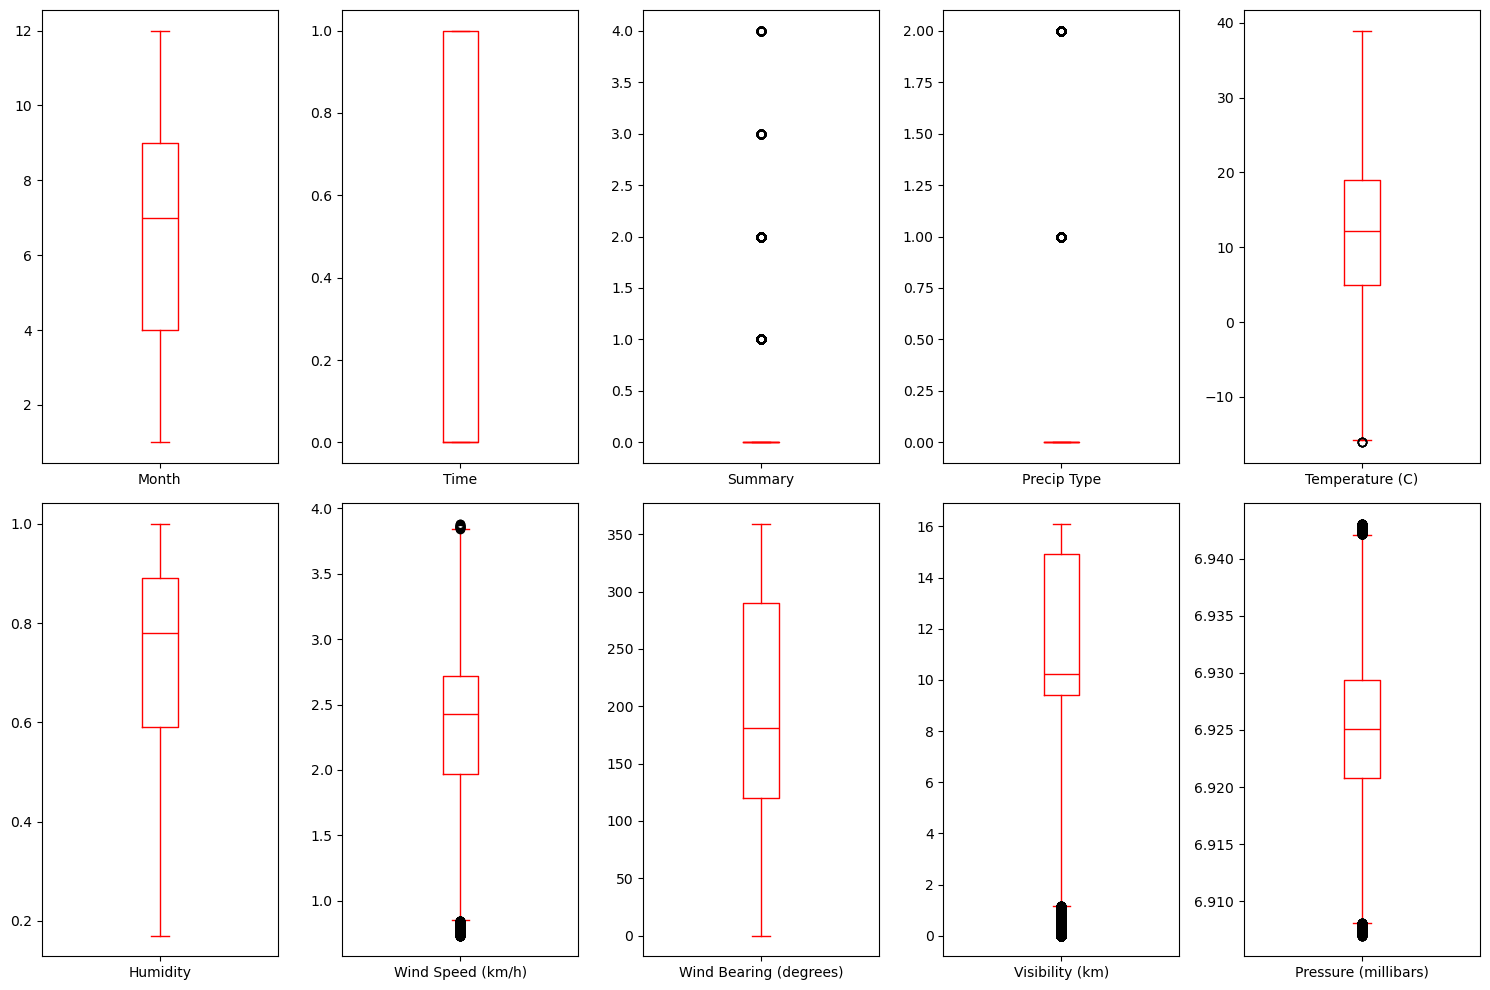

In [46]:
df.plot(kind="box",subplots=True,layout=(2,5),figsize=(15,10),color="r")
plt.tight_layout()
plt.show()

In [47]:
df.shape

(89736, 10)

## 5.MODEL TRAINING

### 5.1 SPLITING

In [48]:
# SPLITING  FEATURES AND TARGET
x=df.drop(columns=['Summary'])
y=df['Summary']

In [49]:
# SPLITING TRAINING AND TESTING DATA
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

print("shape: ",x_train.shape)
print("shape: ",x_test.shape)
print("shape: ",y_train.shape)
print("shape: ",y_test.shape)

shape:  (62815, 9)
shape:  (26921, 9)
shape:  (62815,)
shape:  (26921,)


In [50]:
x_test

,Month,Time,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
35582,4,0,0,19.805556,0.43,2.777931,7,11.4471,6.932458
87583,9,0,0,17.755556,0.65,2.929918,291,9.9820,6.924249
63074,12,1,1,-1.666667,0.92,1.984993,111,4.8461,6.942727
93717,5,1,0,6.027778,0.86,1.516906,273,16.1000,6.926597
15162,5,1,0,17.822222,0.33,2.475159,62,9.9820,6.921195
...,...,...,...,...,...,...,...,...,...
2135,12,1,0,6.644444,0.87,2.705293,160,9.7566,6.924878
43638,9,0,0,7.900000,0.96,2.179366,242,9.9820,6.923097
66354,6,0,0,14.011111,0.89,2.149795,238,10.8997,6.921352
30497,7,0,0,25.605556,0.59,2.587794,322,11.4471,6.918181


### 5.2 BALANCING

In [51]:
sm=SMOTE()
x_train,y_train=sm.fit_resample(x_train,y_train)


In [52]:
x_train.shape

(259420, 9)

### 5.3 SCALING

In [53]:
# scaler=StandardScaler()
# df[["Pressure (millibars)","Wind Bearing (degrees)"]]=scaler.fit_transform(df[["Pressure (millibars)","Wind Bearing (degrees)"]])

In [54]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train[["Pressure (millibars)","Wind Bearing (degrees)"]])
x_test=scaler.transform(x_test[["Pressure (millibars)","Wind Bearing (degrees)"]])

In [55]:
print(x_test)

[[ 1.12975105 -1.93575283]
 [-0.20332675  0.77996451]
 [ 2.79732074 -0.94126479]
 ...
 [-0.67362281  0.2731581 ]
 [-1.18866952  1.07639844]
 [ 1.88685033 -0.67351801]]


### 5.4 MODEL TRAINING 

#### 5.4.1 Logostic 

In [56]:
model_1=LogisticRegression(multi_class="multinomial",n_jobs=-1)
model_1.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', n_jobs=-1)

In [57]:
# TESTING
y_pred=model_1.predict(x_test)

In [58]:
#EVALUATION

recall=recall_score(y_test,y_pred,average="weighted")
precision=precision_score(y_test,y_pred,average="weighted")
accuracy=accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')


report=classification_report(y_test,y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(report)


Accuracy: 0.17413914787712195
Precision: 0.7146908749478251
Recall: 0.17413914787712198
F1 Score: 0.2408274610279658
              precision    recall  f1-score   support

           0       0.84      0.16      0.26     22236
           1       0.13      0.08      0.10      2817
           2       0.13      0.54      0.20      1812
           3       0.00      0.26      0.00        31
           4       0.00      0.80      0.01        25

    accuracy                           0.17     26921
   macro avg       0.22      0.37      0.11     26921
weighted avg       0.71      0.17      0.24     26921



<Axes: xlabel='Summary', ylabel='Count'>

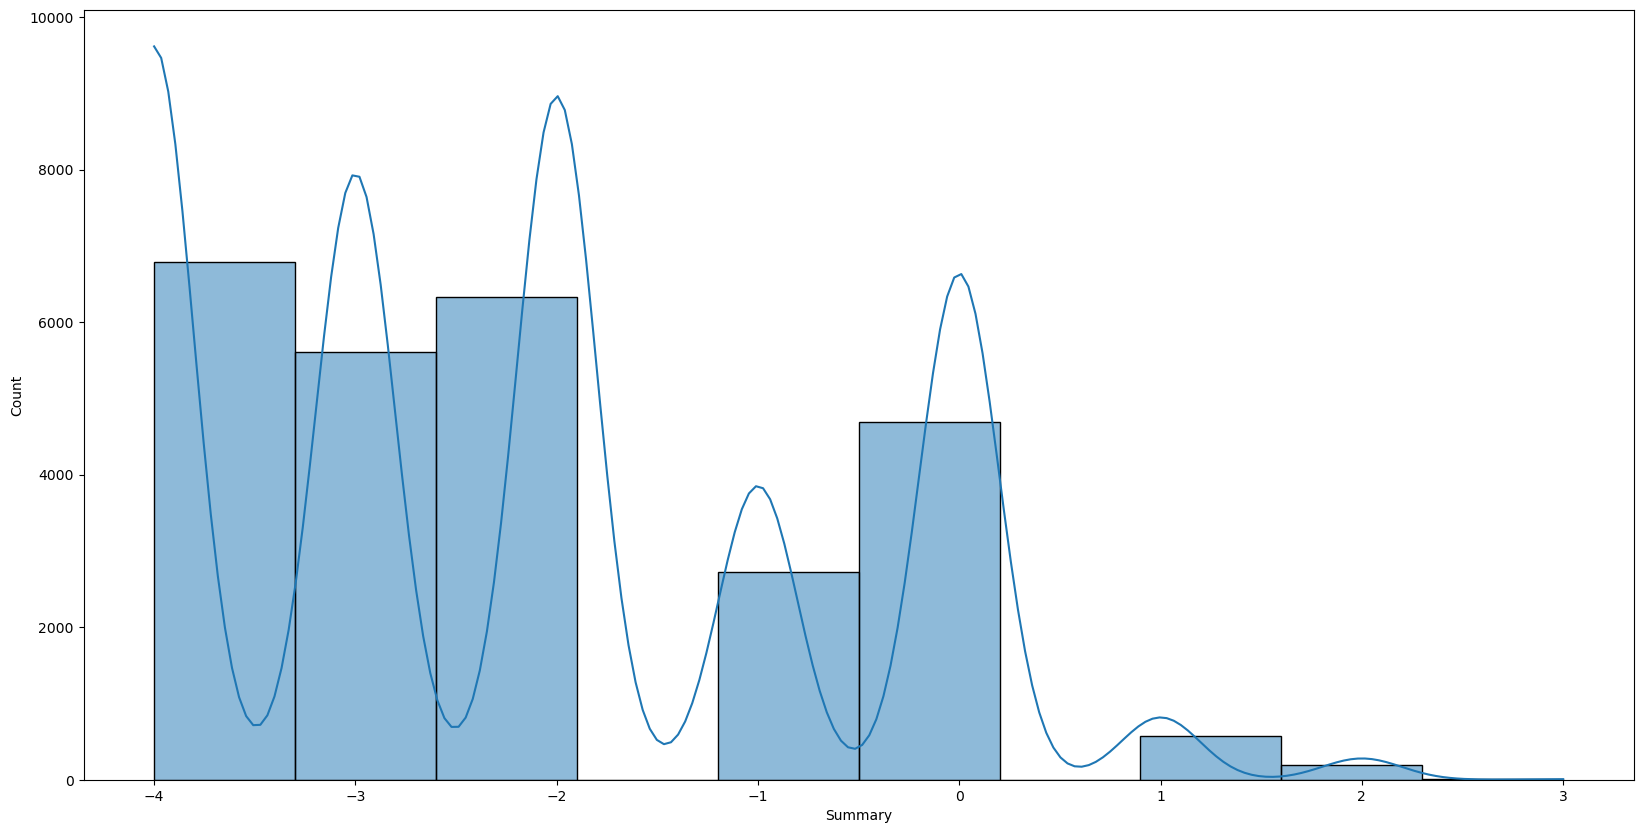

In [59]:
data=y_test-y_pred
plt.figure(figsize=(20,10))
sns.histplot(bins=10,x=data,kde=True)

In [60]:
# THE ERROR DISTRIBUTION IS NOT NORMAL DISTRIBUTION
#  SO FROM THIS THIS DATASET CANT TRAIN WITH LOGISTIC REGRESSION

In [61]:
#CONFUSION MATRIX
confusion_matrix(y_test,y_pred)

array([[3464, 1316, 5708, 4958, 6790],
       [ 469,  215, 1143,  336,  654],
       [ 194,   95,  981,  255,  287],
       [   5,    1,   10,    8,    7],
       [   0,    0,    2,    3,   20]], dtype=int64)

#### 5.4.2 Logostic (l2)

In [62]:
model=LogisticRegression(penalty="l2",multi_class="multinomial",n_jobs=-1)
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', n_jobs=-1)

### 5.5 TESTING DATA

In [63]:
y_pred=model.predict(x_test)

### 5.6 EVALUATION

In [64]:
recall=recall_score(y_test,y_pred,average="weighted")
precision=precision_score(y_test,y_pred,average="weighted")
accuracy=accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')


report=classification_report(y_test,y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(report)



Accuracy: 0.17413914787712195
Precision: 0.7146908749478251
Recall: 0.17413914787712198
F1 Score: 0.2408274610279658
              precision    recall  f1-score   support

           0       0.84      0.16      0.26     22236
           1       0.13      0.08      0.10      2817
           2       0.13      0.54      0.20      1812
           3       0.00      0.26      0.00        31
           4       0.00      0.80      0.01        25

    accuracy                           0.17     26921
   macro avg       0.22      0.37      0.11     26921
weighted avg       0.71      0.17      0.24     26921



In [65]:
#CONFUSION MATRIX
confusion_matrix(y_test,y_pred)


array([[3464, 1316, 5708, 4958, 6790],
       [ 469,  215, 1143,  336,  654],
       [ 194,   95,  981,  255,  287],
       [   5,    1,   10,    8,    7],
       [   0,    0,    2,    3,   20]], dtype=int64)

## 7.SAVING MODEL

In [66]:
import pickle
with open ("weather_predict_model.pkl","wb") as file:
    pickle.dump(model,file)

## 8.LOADING MODEL

In [67]:
with open ("weather_predict_model.pkl","rb") as file:
    loaded_model=pickle.load(file)

loaded_model

LogisticRegression(multi_class='multinomial', n_jobs=-1)

## 9. DECISION TREE CLASSIFIER

In [68]:
# LIBRARY
from sklearn.tree import DecisionTreeClassifier

In [69]:
# SPLITING  FEATURES AND TARGET
x=df.drop(columns=['Summary'])
y=df['Summary']

# SPLITING TRAINING AND TESTING DATA
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

print("shape: ",x_train.shape)
print("shape: ",x_test.shape)
print("shape: ",y_train.shape)
print("shape: ",y_test.shape)

shape:  (62815, 9)
shape:  (26921, 9)
shape:  (62815,)
shape:  (26921,)


In [70]:
# MODEL TRAINING
tree_classifier=DecisionTreeClassifier(random_state=42,criterion="entropy",min_samples_split=2,max_depth=10)
tree_classifier.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [71]:
# MODEL TETSING
y_predict=tree_classifier.predict(x_test)

### 9.1 EVALUATION

In [72]:
recall=recall_score(y_test,y_predict,average="weighted")
precision=precision_score(y_test,y_predict,average="weighted")
accuracy=accuracy_score(y_test,y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')


report=classification_report(y_test,y_predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(report)


Accuracy: 0.8927231529289402
Precision: 0.8581254266962258
Recall: 0.8927231529289402
F1 Score: 0.8611093900723019
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     22276
           1       0.47      0.10      0.17      2810
           2       1.00      1.00      1.00      1782
           3       0.75      0.19      0.31        31
           4       0.63      0.55      0.59        22

    accuracy                           0.89     26921
   macro avg       0.75      0.56      0.60     26921
weighted avg       0.86      0.89      0.86     26921



### 9.2 GRID SEARCH

In [73]:
# LIBRARY
from sklearn.model_selection import GridSearchCV

pram_grid={"criterion":["entropy","gini"],
           "min_samples_split":[2,3,4,5],
           "max_depth":[None,15,10,20]
    }

grid=GridSearchCV(DecisionTreeClassifier(random_state=42),pram_grid,cv=5,scoring="accuracy",verbose=2,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 15, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy', verbose=2)

In [74]:
print("best parameters combo",grid.best_params_)
print("best accuracy",grid.best_score_)

# IT SHOWS {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2} THIS IS THE BEST PARAMETER COMBO.


best parameters combo {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
best accuracy 0.8922550346254875


### 9.3 SAVING AND LOADING MODEL 

In [75]:
with open ("weather_predict_TreeModel.pkl","wb") as file:
    pickle.dump(model,file)

In [76]:
with open ("weather_predict_TreeModel.pkl","rb") as file:
    loaded_model=pickle.load(file)

loaded_model

LogisticRegression(multi_class='multinomial', n_jobs=-1)

## 10. RANDOM FOREST

### 10.1 TRAINING

In [77]:
from sklearn.ensemble import RandomForestClassifier

# MODEL TRAINING
forest_classifier = RandomForestClassifier(
    random_state=42,
    criterion="entropy",         
    min_samples_split=2,
    max_depth=10,
    n_estimators=100,            # number of trees in the forest (default is 100)
    n_jobs=-1   )                 

forest_classifier.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1,
                       random_state=42)

### 10.2 TESTING

In [78]:
# MODEL TETSING
y_predic=forest_classifier.predict(x_test)

### 10.3 EVUALATION

In [79]:
recall=recall_score(y_test,y_predic,average="weighted")
precision=precision_score(y_test,y_predic,average="weighted")
accuracy=accuracy_score(y_test,y_predic)
f1 = f1_score(y_test, y_predic, average='weighted')
confusion =confusion_matrix(y_test, y_predic)

report=classification_report(y_test,y_predic)

print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(report)

[[22269     5     0     0     2]
 [ 2750    56     4     0     0]
 [    0     0  1782     0     0]
 [   23     0     3     5     0]
 [   14     0     0     0     8]]
Accuracy: 0.8959548308012333
Precision: 0.898982997067185
Recall: 0.8959548308012333
F1 Score: 0.8494777229492727
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     22276
           1       0.92      0.02      0.04      2810
           2       1.00      1.00      1.00      1782
           3       1.00      0.16      0.28        31
           4       0.80      0.36      0.50        22

    accuracy                           0.90     26921
   macro avg       0.92      0.51      0.55     26921
weighted avg       0.90      0.90      0.85     26921



# Weather Prediction Project Summary

The **Weather Prediction Project** aimed to analyze historical meteorological data and predict future weather conditions using various machine learning models.

## Key Steps Undertaken

- **Data Preprocessing**: Cleaned and prepared the dataset for modeling.
- **Exploratory Data Analysis (EDA)**: Identified patterns, trends, and anomalies in the data.
- **Feature Selection**: Chose the most relevant features such as temperature, humidity, wind speed, and pressure.

## Models Evaluated

- Linear Regression  
- Decision Tree  
- **Random Forest**

## Best Performing Model: Random Forest 

The **Random Forest model** delivered the most accurate and stable results due to:

- Its ability to handle **non-linear relationships**
- **Reduced overfitting** through ensemble learning
- Effective capture of **complex interactions** among weather features

Its ensemble nature ensured **high prediction accuracy and reliability**, making **Random Forest the best-suited model** for this weather dataset.